In [1396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1397]:
df = pd.read_csv('/content/sales forcasting.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#DATA INSPECTION

In [1398]:
df.shape

(9800, 18)

In [1399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [1400]:
df.nunique()

,0
Row ID,9800
Order ID,4922
Order Date,1230
Ship Date,1326
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,529


In [1401]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [1402]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [1403]:
df.duplicated().sum()

np.int64(0)

#DATA CLEANING

In [1404]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [1405]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [1406]:
df.dtypes

,0
row_id,int64
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


In [1407]:
df['postal_code'] = pd.to_numeric(df['postal_code'], errors='coerce')
df['postal_code'] = df['postal_code'].fillna(df['postal_code'].mode()[0])
df['postal_code'] = df['postal_code'].astype('int64')

In [1408]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [1409]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [1410]:
df.dtypes

,0
row_id,int64
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


In [1411]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d/%m/%Y')

In [1412]:
df.dtypes

,0
row_id,int64
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


In [1413]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['order_weekday'] = df['order_date'].dt.day_name()

In [1414]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub-category,product_name,sales,order_year,order_month,order_day,order_weekday
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,Wednesday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,Wednesday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,Monday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,21,Sunday
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,12,Tuesday
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,12,Tuesday
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,12,Tuesday


In [1415]:
df['delivery_days'] = (df['ship_date'] - df['order_date'])
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub-category,product_name,sales,order_year,order_month,order_day,order_weekday,delivery_days
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,Wednesday,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,Wednesday,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,Monday,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,Tuesday,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,Tuesday,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,21,Sunday,7 days
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,12,Tuesday,5 days
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,12,Tuesday,5 days
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,12,Tuesday,5 days


In [1416]:
df['delivery_days'] = pd.to_numeric(df['delivery_days'].dt.days, errors='coerce')

In [1417]:
df.dtypes

,0
row_id,int64
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


#EDA

In [1418]:
#Target Variable
df['sales'].describe()

,sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


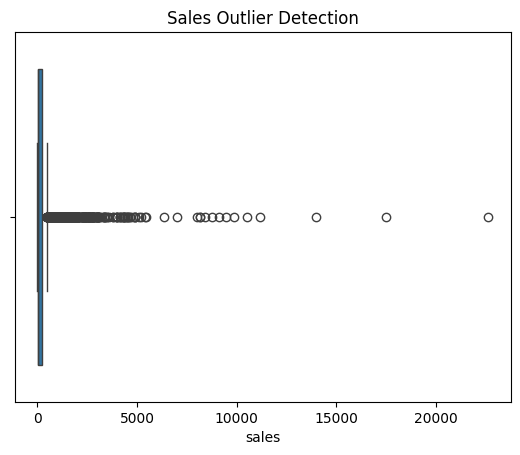

In [1419]:
#Target variable outlier detection
plt.figure()
sns.boxplot(x=df['sales'])
plt.title("Sales Outlier Detection")
plt.show()

#Insight:
The sales distribution tempo reveals variability with potential outliers, which means that the various points on the distribution have different performance levels.

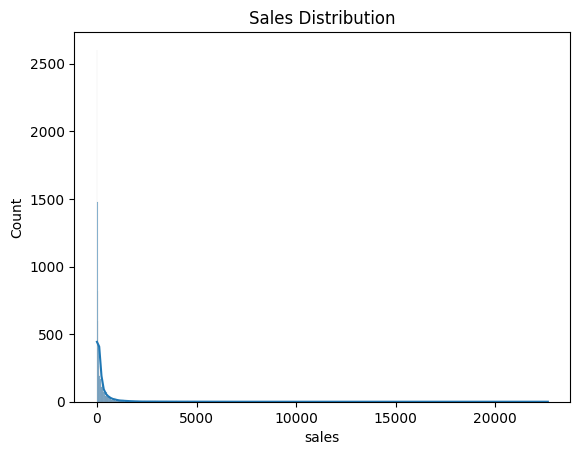

In [1420]:
plt.figure()
sns.histplot(df['sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

#Insight:
The sales distribution is uneven across the records, which is an indication of varying levels of performance.

In [1421]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n", numerical_cols)
print("\nCategorical Columns:\n", categorical_cols)

Numerical Columns:
 Index(['row_id', 'postal_code', 'sales', 'delivery_days'], dtype='object')

Categorical Columns:
 Index(['order_id', 'ship_mode', 'customer_id', 'customer_name', 'segment',
       'country', 'city', 'state', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'order_weekday'],
      dtype='object')


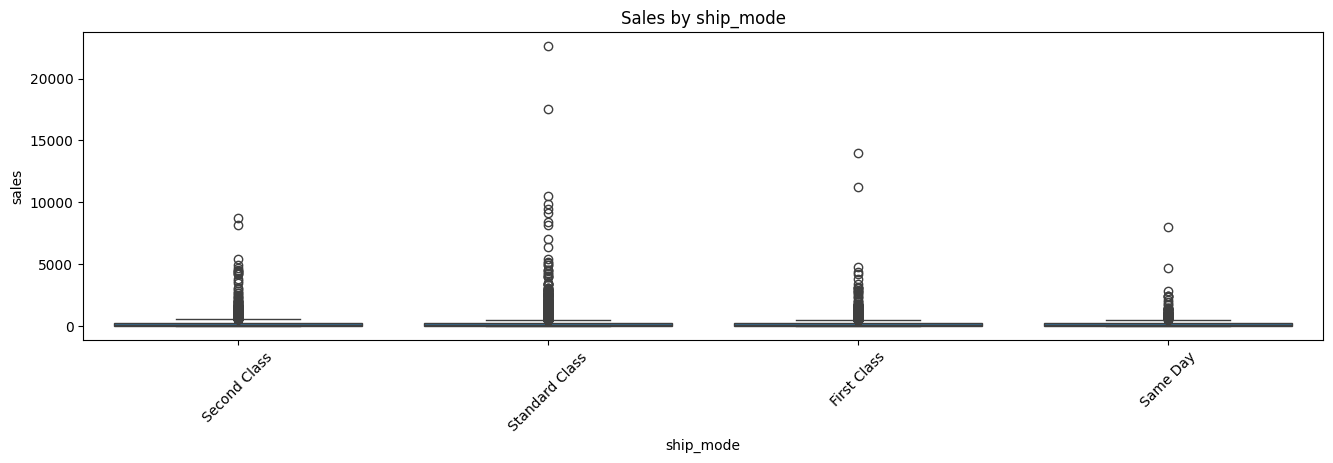

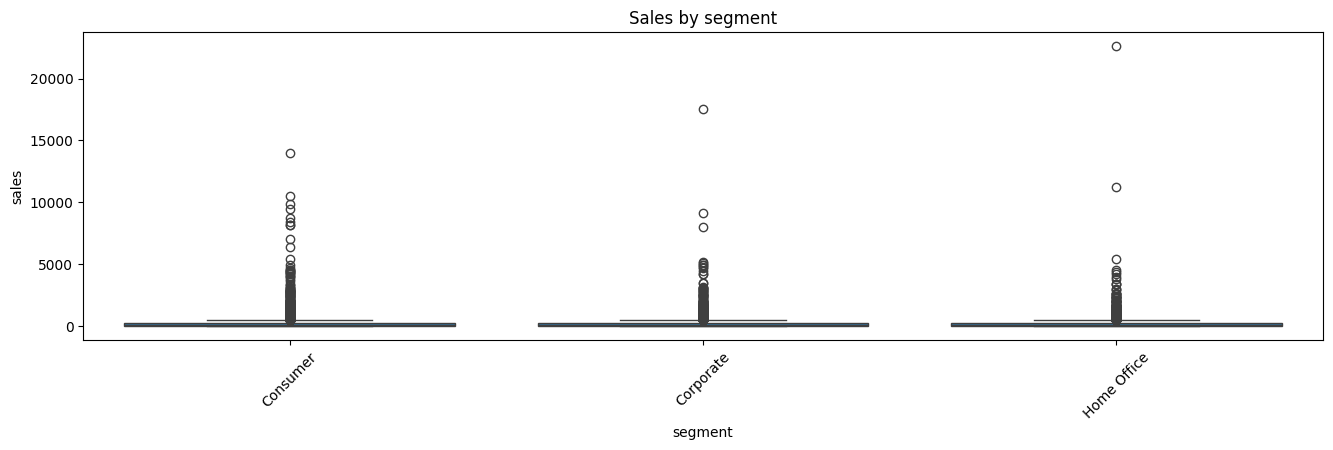

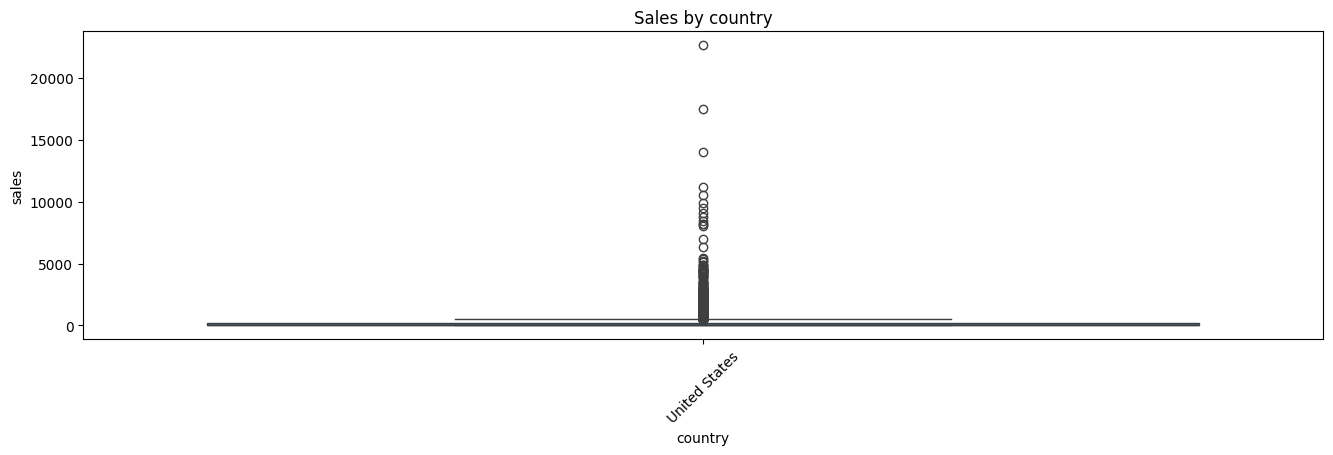

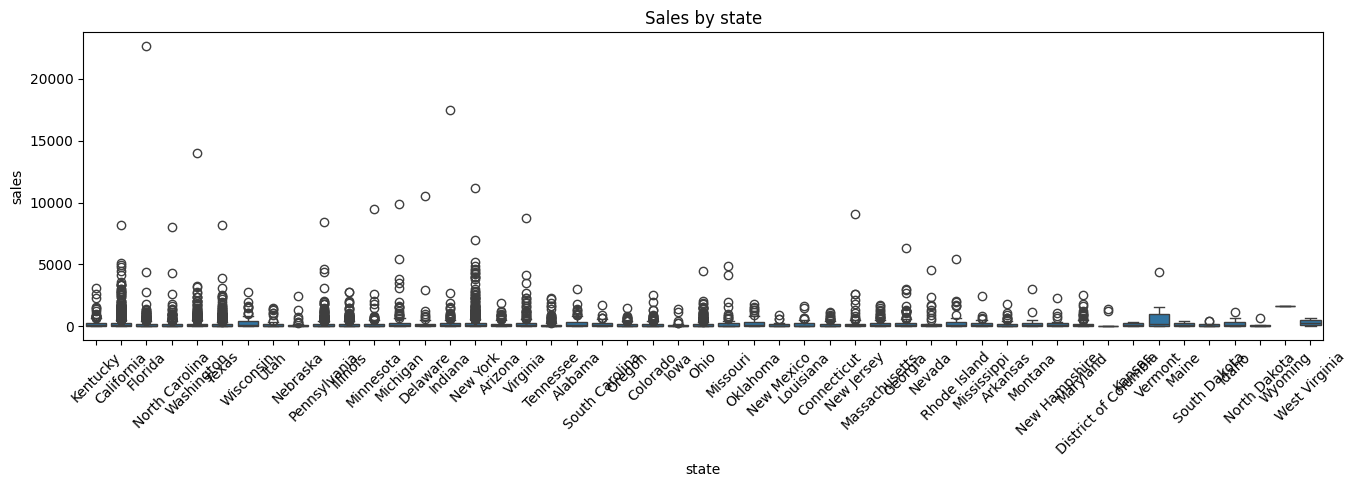

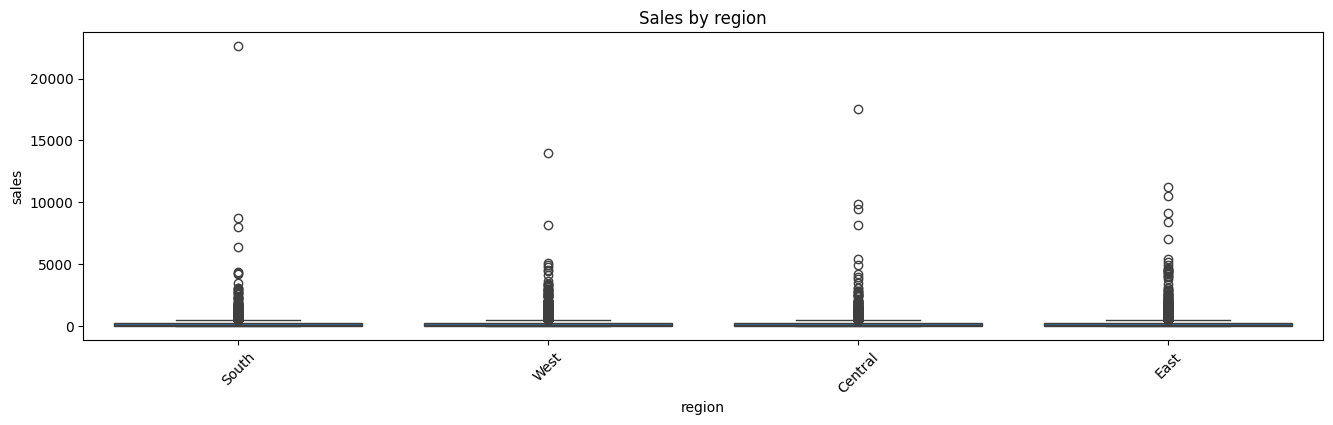

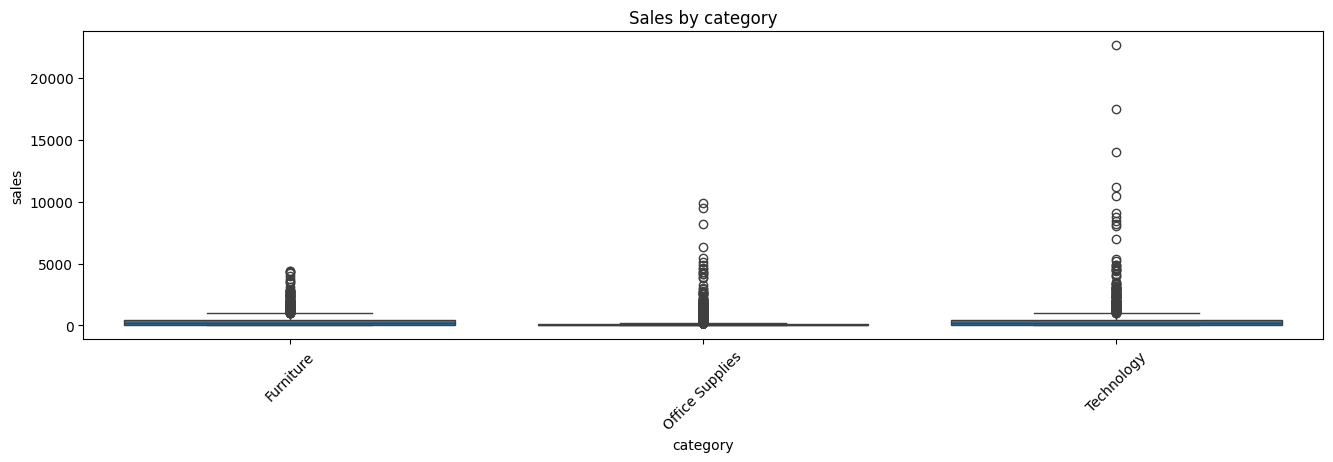

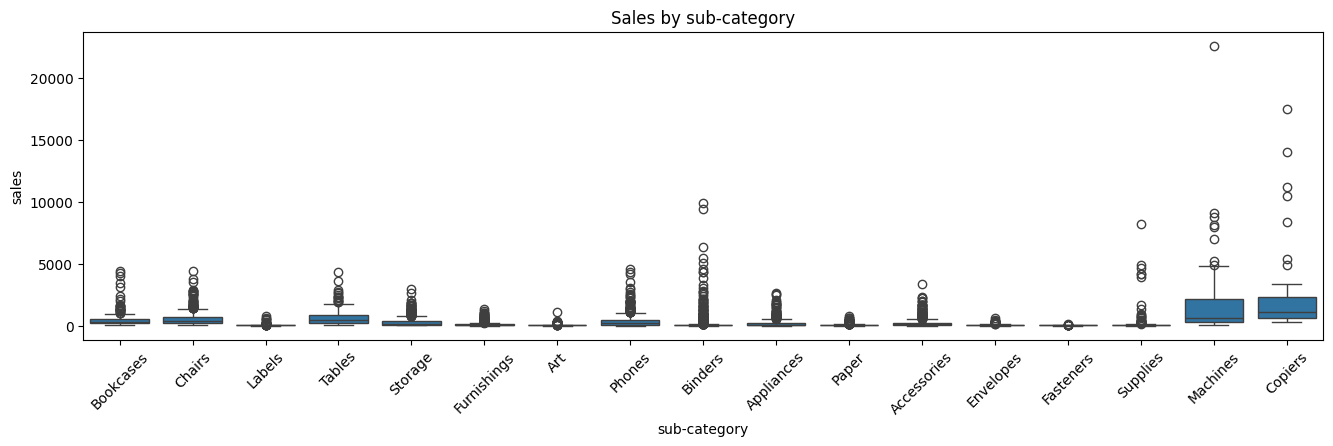

In [1422]:
cat_cols = ['ship_mode', 'segment', 'country', 'state', 'region', 'category', 'sub-category']
for col in cat_cols:
    plt.figure(figsize=(16,4))
    sns.boxplot(x=df[col], y=df['sales'])
    plt.title(f'Sales by {col}')
    plt.xticks(rotation=45)
    plt.show()

#Insight
Sales fluctuate extensively by categories, which means there is a high level of dependence on categorical features.

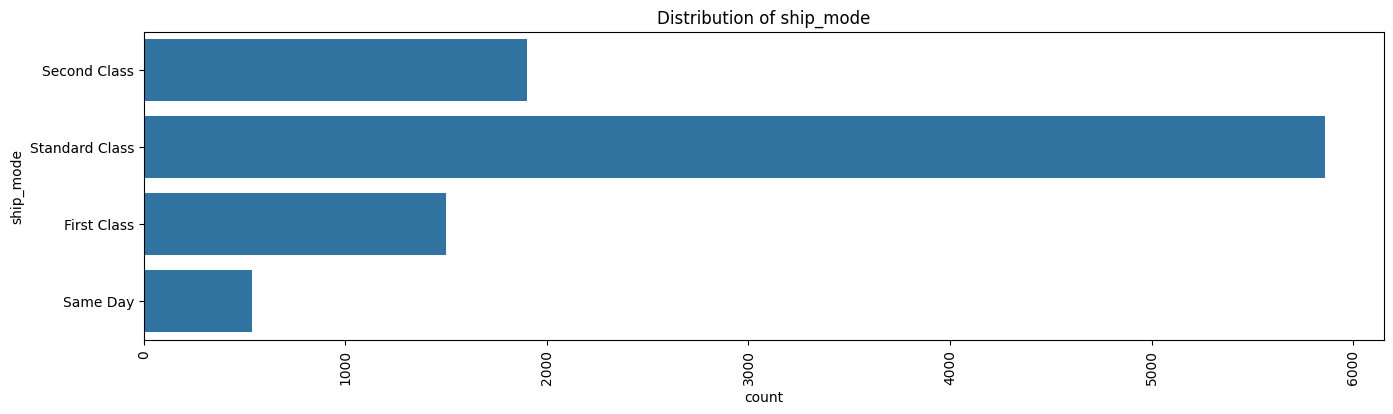

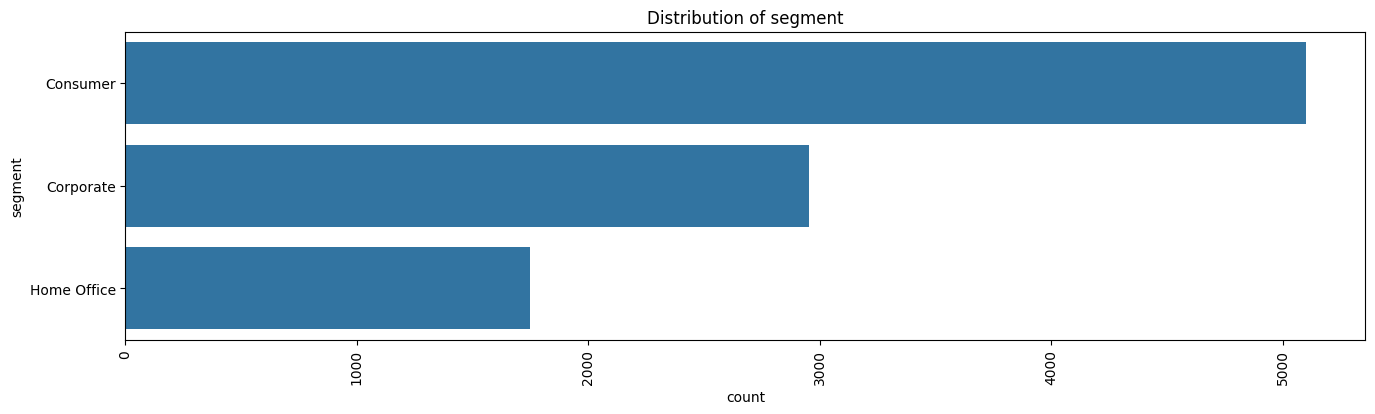

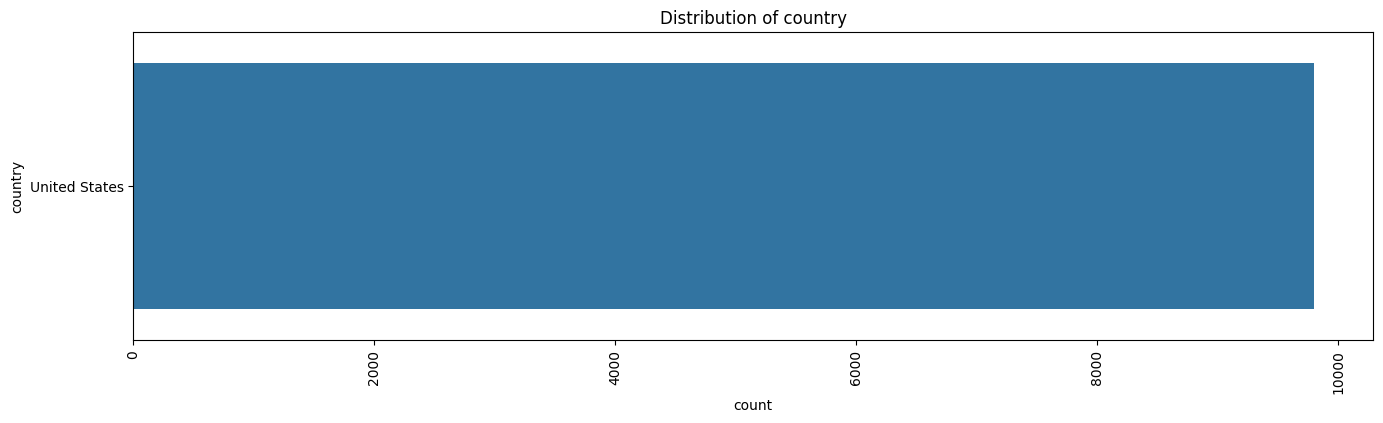

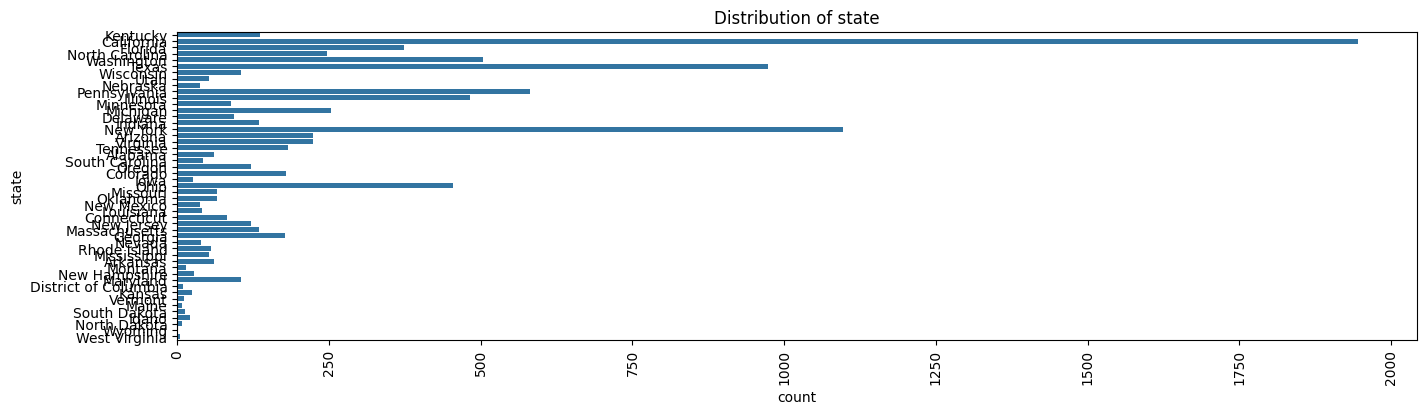

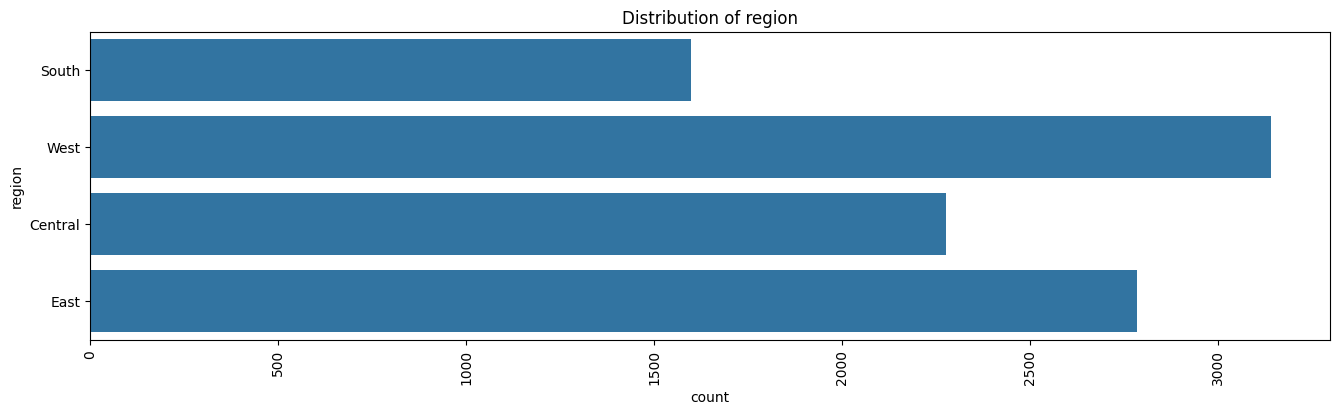

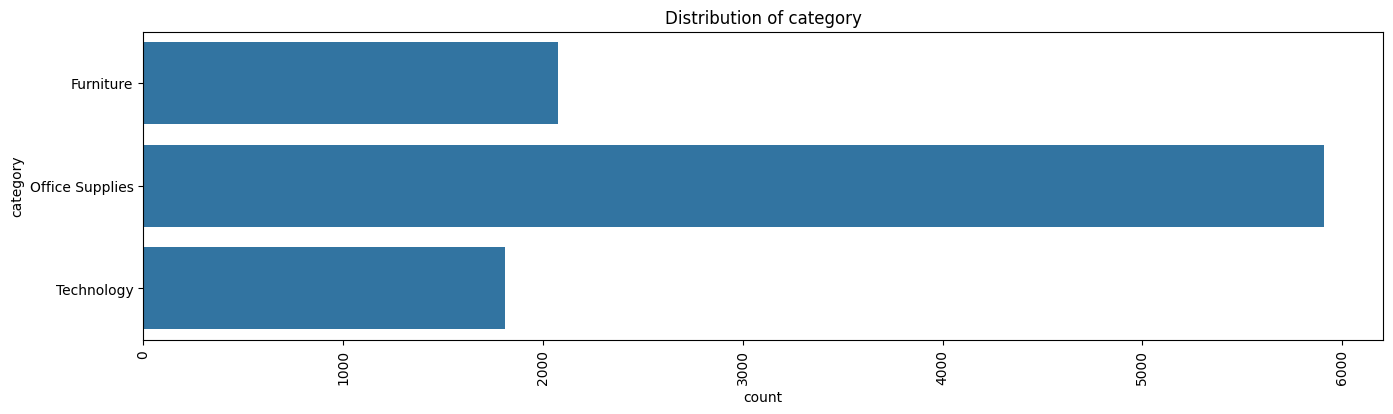

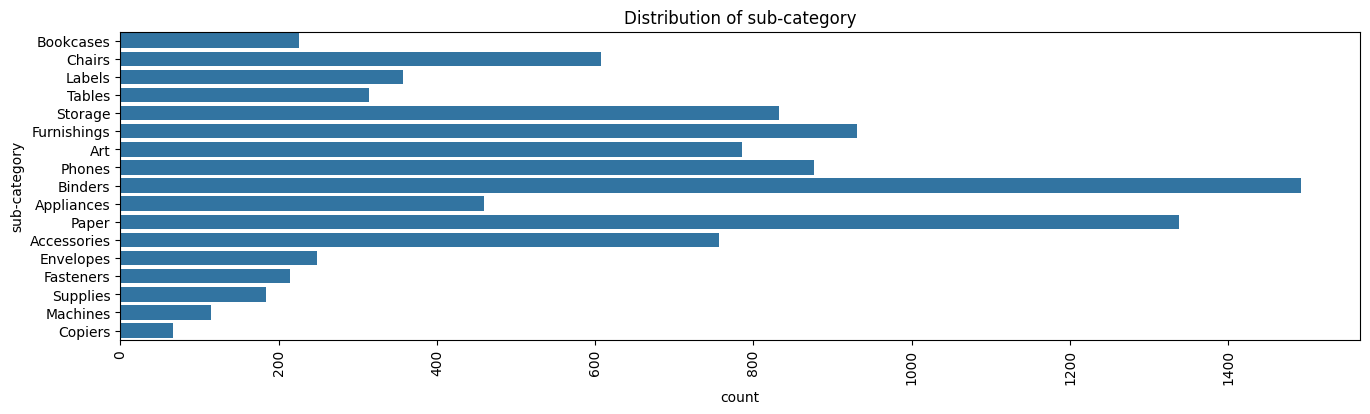

In [1423]:
for col in cat_cols:
    plt.figure(figsize=(16,4))
    sns.countplot(y=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

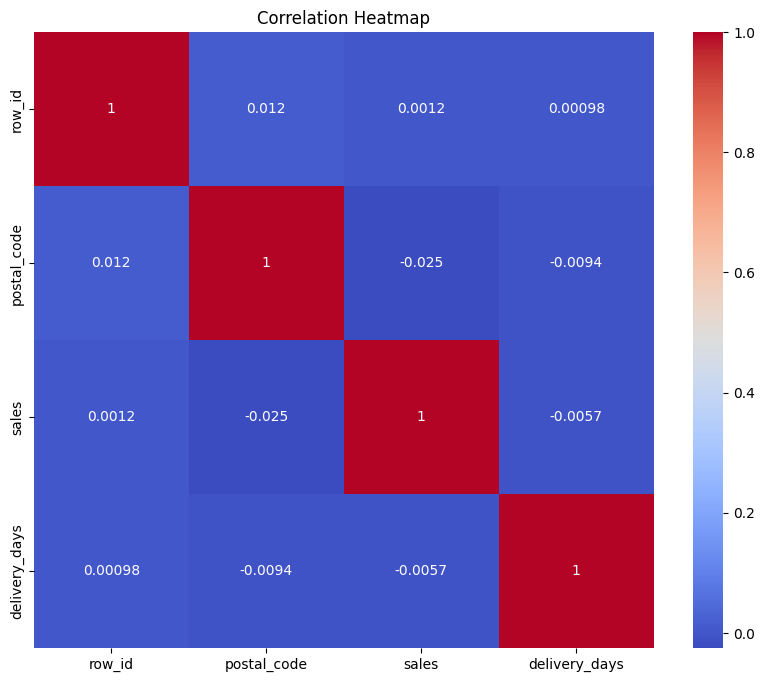

In [1424]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#Insight
Correlation analysis identified the main predictors that have the strongest association with sales.

In [1425]:
for col in cat_cols:
    print(f"\nAverage Sales by {col}")
    print(df.groupby(col)['sales'].mean().sort_values(ascending=False))



Average Sales by ship_mode
ship_mode
Second Class      236.547939
Same Day          232.749143
First Class       230.228020
Standard Class    228.849856
Name: sales, dtype: float64

Average Sales by segment
segment
Home Office    243.403309
Corporate      233.150720
Consumer       225.065777
Name: sales, dtype: float64

Average Sales by country
country
United States    230.769059
Name: sales, dtype: float64

Average Sales by state
state
Wyoming                 1603.136000
Vermont                  811.760909
Nevada                   428.951333
Rhode Island             409.545927
Montana                  372.623467
Indiana                  360.877037
Missouri                 336.441667
Minnesota                335.541011
Alabama                  319.846557
Virginia                 315.342500
West Virginia            302.456000
Michigan                 300.933099
Oklahoma                 298.233182
Wisconsin                296.889810
Delaware                 293.795688
District of Columb

#Insight
Different groups have on average higher average sales in each case making it the key predictor.

In [1426]:
for col in cat_cols:
    contribution = df.groupby(col)['sales'].sum()
    contribution_percent = (contribution / contribution.sum()) * 100
    print(f"\nSales Contribution (%) by {col}")
    print(contribution_percent.sort_values(ascending=False))


Sales Contribution (%) by ship_mode
ship_mode
Standard Class    59.288503
Second Class      19.894179
First Class       15.280417
Same Day           5.536900
Name: sales, dtype: float64

Sales Contribution (%) by segment
segment
Consumer       50.764619
Corporate      30.443638
Home Office    18.791743
Name: sales, dtype: float64

Sales Contribution (%) by country
country
United States    100.0
Name: sales, dtype: float64

Sales Contribution (%) by state
state
California              19.734654
New York                13.546591
Texas                    7.453893
Washington               5.978539
Pennsylvania             5.141488
Florida                  3.910462
Illinois                 3.503658
Michigan                 3.366564
Ohio                     3.322093
Virginia                 3.123395
North Carolina           2.439313
Indiana                  2.154217
Georgia                  2.132139
Kentucky                 1.612107
Arizona                  1.559676
New Jersey              

#Insight
Majority of sales come from only a few categories.

In [1427]:
for col in cat_cols:
    print(f"\nSales Std Deviation by {col}")
    print(df.groupby(col)['sales'].std().sort_values(ascending=False))


Sales Std Deviation by ship_mode
ship_mode
Standard Class    650.773802
First Class       636.898300
Second Class      560.944528
Same Day          546.497352
Name: sales, dtype: float64

Sales Std Deviation by segment
segment
Home Office    762.862506
Corporate      600.111546
Consumer       588.933757
Name: sales, dtype: float64

Sales Std Deviation by country
country
United States    626.651875
Name: sales, dtype: float64

Sales Std Deviation by state
state
Indiana                 1538.033027
Vermont                 1309.310745
Florida                 1221.147158
Delaware                1129.903099
Minnesota               1070.678744
New Jersey               916.904227
Nevada                   881.267531
Rhode Island             860.049996
Missouri                 830.866752
Michigan                 829.133332
Virginia                 792.001296
Montana                  784.412796
Washington               766.173086
New York                 699.602042
North Carolina           651.3

#Insight
Some categories exhibit greater variance, which means sales performance is not stable.

In [1428]:
df[cat_cols].nunique().sort_values(ascending=False)

,0
state,49
sub-category,17
ship_mode,4
region,4
segment,3
category,3
country,1


In [1430]:
df = df.drop(columns=['row_id'])

In [1431]:
df

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub-category,product_name,sales,order_year,order_month,order_day,order_weekday,delivery_days
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,8,Wednesday,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,8,Wednesday,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,12,Monday,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,11,Tuesday,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,11,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,...,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,21,Sunday,7
9796,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,12,Tuesday,5
9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,12,Tuesday,5
9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,12,Tuesday,5
